In [1]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2
from colorthief import ColorThief


# Load image

In [2]:
air_cover = "../data/source/images/40654268451-px_500.jpg"
frank_ocean_cover = "../data/source/images/14420632959-px_500.jpg"

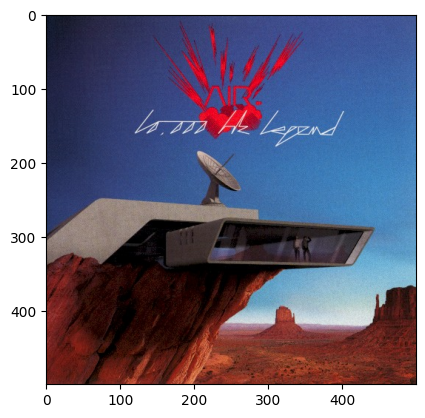

In [3]:
img = Image.open(air_cover)

plt.imshow(img)
# plt.axis("off")
plt.show()

In [4]:
# Image is already in RGB
colors = img.convert('RGB').getcolors(10000000)

if colors is None:
    print("Too many unique colors to count with the specified maxcolors.")
else:
    # Print top 10 most common colors
    colors.sort(reverse=True)  # sort by count
    for count, color in colors[:10]:
        print(f"{color}: {count}")

(0, 0, 0): 1135
(1, 0, 0): 890
(3, 0, 0): 488
(0, 0, 2): 472
(0, 1, 0): 452
(4, 0, 0): 388
(28, 0, 0): 258
(29, 0, 0): 230
(31, 0, 0): 226
(7, 0, 0): 224


# K-means clustering

K-means for dominant color extraction takes each pixel as a data point, with three features in each data point: R, G and B if using RGB color space. Coordinates of pixels are not taken into account.

Plotting rgb color space points in a 3d space using matplotlib...

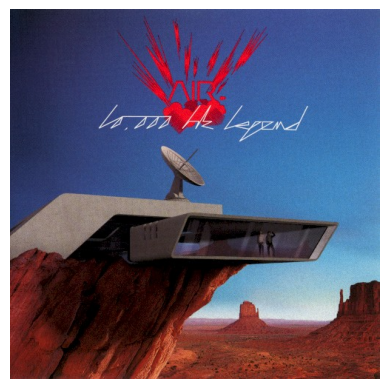

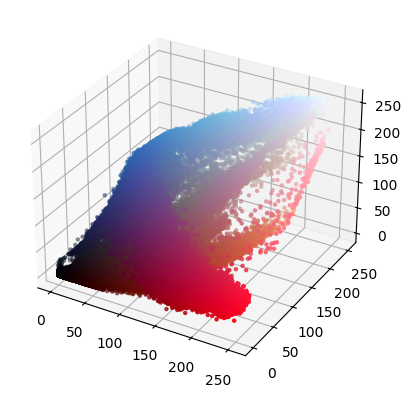

In [5]:
import matplotlib.pyplot as plt
import cv2

#read image
img = cv2.imread(air_cover)

#convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show original image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

#get rgb values from image to 1D array
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()

#plotting 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(r, g, b, c=np.array(list(zip(r, g, b))) / 255.0, marker=".")
plt.show()

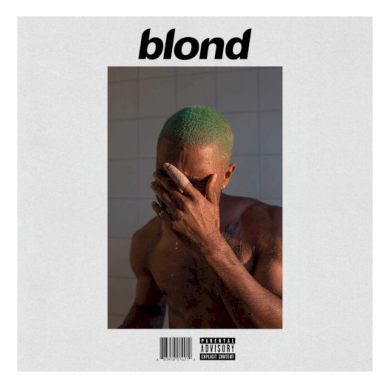

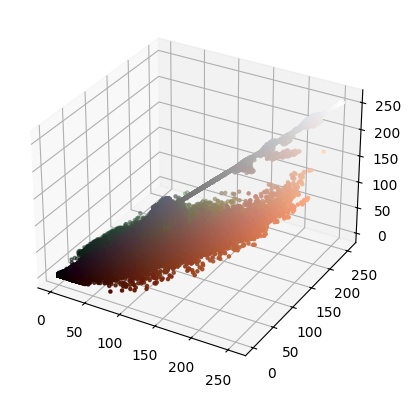

In [6]:
import matplotlib.pyplot as plt
import cv2

#read image
img = cv2.imread(frank_ocean_cover)

#convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show original image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

#get rgb values from image to 1D array
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()

#plotting 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(r, g, b, c=np.array(list(zip(r, g, b))) / 255.0, marker=".")
plt.show()

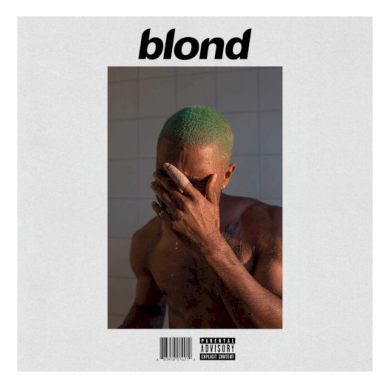

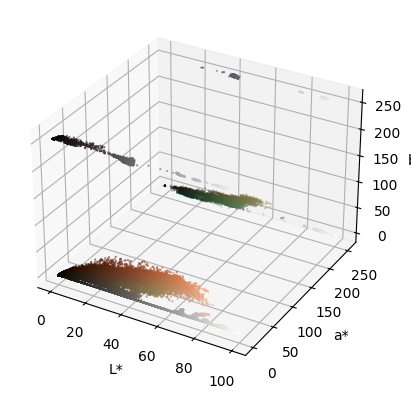

In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# read image
img = cv2.imread(frank_ocean_cover)  # replace with your filename
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show original image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# convert to Lab
lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)

# split channels
L, a, b = cv2.split(lab)

# flatten for plotting
L = L.flatten()
a = a.flatten()
b = b.flatten()

# convert back to float ranges for proper plotting
# L channel in [0,100]
L = L * (100.0 / 255.0)
# a and b channels in [-128,127]
a = a - 128
b = b - 128

# plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# use RGB values for coloring, otherwise points will all be black
rgb = img.reshape((-1, 3)) / 255.0
ax.scatter(L, a, b, c=rgb, marker=".", s=1)

ax.set_xlabel("L*")
ax.set_ylabel("a*")
ax.set_zlabel("b*")
plt.show()


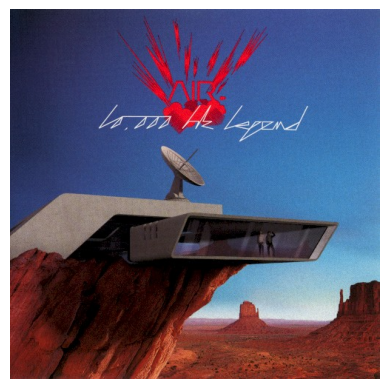

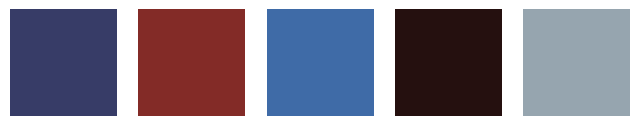

In [8]:
img = Image.open(air_cover)


k = 5
data = np.array(img).reshape(-1, 3)  # Cada píxel como vector RGB
kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
colors = kmeans.cluster_centers_.astype(int)


plt.imshow(img)
plt.axis("off")
plt.show()

# Mostrar colores extraídos
plt.figure(figsize=(8, 2))
for i, color in enumerate(colors):
    plt.subplot(1, k, i + 1)
    plt.axis('off')
    plt.imshow([[color / 255]])
plt.show()

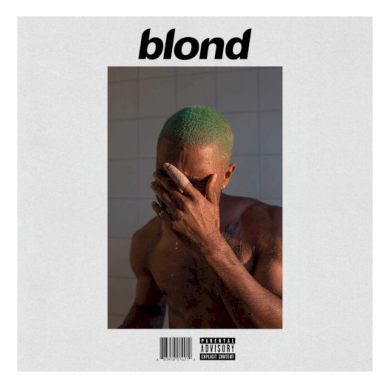

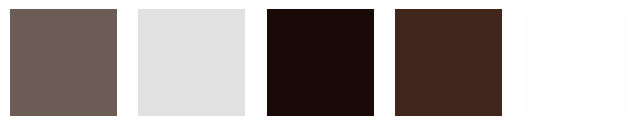

In [9]:
img = Image.open(frank_ocean_cover)


k = 5
data = np.array(img).reshape(-1, 3)  # Cada píxel como vector RGB
kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
colors = kmeans.cluster_centers_.astype(int)


plt.imshow(img)
plt.axis("off")
plt.show()

# Mostrar colores extraídos
plt.figure(figsize=(8, 2))
for i, color in enumerate(colors):
    plt.subplot(1, k, i + 1)
    plt.axis('off')
    plt.imshow([[color / 255]])
plt.show()

Using LAb colorspace...

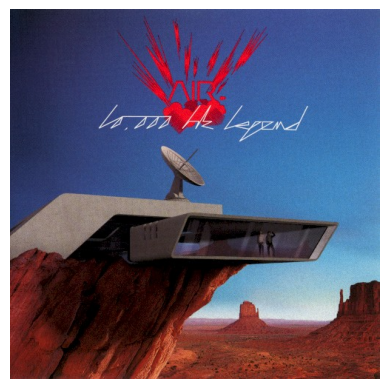

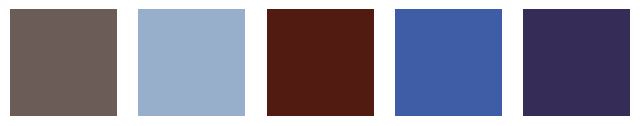

In [10]:
img = Image.open(air_cover)
img_np = np.array(img)

# Convert RGB to LAB
img_lab = cv2.cvtColor(img_np, cv2.COLOR_RGB2HSV)

# Reshape to (N, 3)
data = img_lab.reshape(-1, 3)

# Apply K-means
k = 5
kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
colors_lab = kmeans.cluster_centers_.astype(int)

# Convert LAB back to RGB to display
colors_rgb = cv2.cvtColor(np.uint8(colors_lab[np.newaxis, :, :]), cv2.COLOR_HSV2RGB)[0]

plt.imshow(img)
plt.axis("off")
plt.show()

# Show colors
plt.figure(figsize=(8, 2))
for i, color in enumerate(colors_rgb):
    plt.subplot(1, k, i + 1)
    plt.axis('off')
    plt.imshow([[color / 255]])
plt.show()


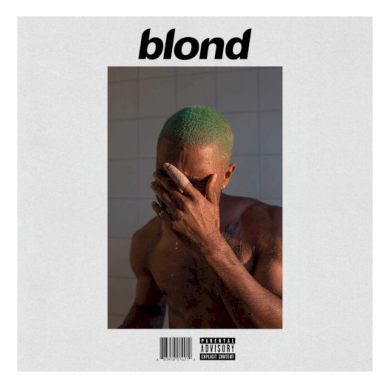

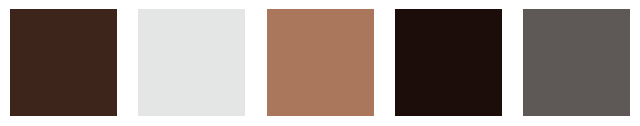

In [11]:
img = Image.open(frank_ocean_cover)
img_np = np.array(img)

# Convert RGB to LAB
img_lab = cv2.cvtColor(img_np, cv2.COLOR_RGB2LAB)

# Reshape to (N, 3)
data = img_lab.reshape(-1, 3)

# Apply K-means
k = 5
kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
colors_lab = kmeans.cluster_centers_.astype(int)

# Convert LAB back to RGB to display
colors_rgb = cv2.cvtColor(np.uint8(colors_lab[np.newaxis, :, :]), cv2.COLOR_LAB2RGB)[0]

plt.imshow(img)
plt.axis("off")
plt.show()

# Show colors
plt.figure(figsize=(8, 2))
for i, color in enumerate(colors_rgb):
    plt.subplot(1, k, i + 1)
    plt.axis('off')
    plt.imshow([[color / 255]])
plt.show()


Color quantization with opencv

<function matplotlib.pyplot.show(close=None, block=None)>

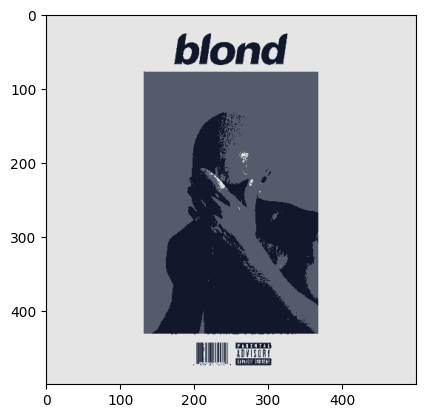

In [12]:
img = cv2.imread(frank_ocean_cover)
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.imshow(res2)
plt.show

<Axes: >

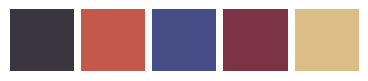

In [13]:
from albcovis.services.dominant_color_extraction import dominant_colors_kmeans, plot_color_swatch

jlh_cover = "../data/source/images/38767658963-px_500.jpg"

out = dominant_colors_kmeans(jlh_cover, k=5)
plot_color_swatch(out)

# Color Thief

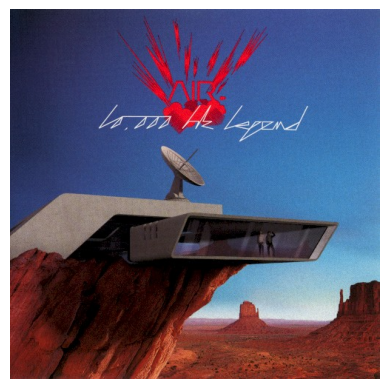

Dominant Color: (68, 81, 126)


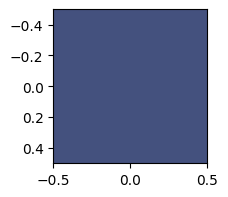

Top 5 Colors: [(68, 81, 126), (190, 127, 133), (68, 25, 20), (127, 179, 207), (72, 136, 191)]


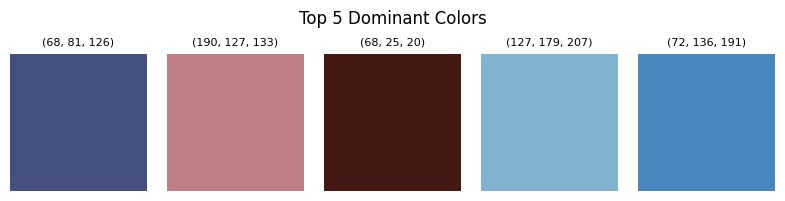

In [14]:
img = Image.open(air_cover)
plt.imshow(img)
plt.axis("off")
plt.show()

# Create ColorThief object
color_thief = ColorThief(air_cover)

# Extract dominant color with adjustable quality
quality = 5  # You can change this: 1 (high quality, slow) to ~10+ (faster, lower quality)
dominant_color = color_thief.get_color(quality=quality)
print(f"Dominant Color: {dominant_color}")
plt.figure(figsize=(2, 2))
plt.imshow([[dominant_color]])
plt.show()

n_dominant_colors = 5
# Extract top 5 dominant colors (palette)
palette = color_thief.get_palette(color_count=n_dominant_colors, quality=quality)
print(f"Top 5 Colors: {palette}")

# Plot the colors
plt.figure(figsize=(8, 2))
for i, color in enumerate(palette):
    plt.subplot(1, n_dominant_colors, i+1)
    plt.imshow([[color]])
    plt.axis('off')
    plt.title(f'{color}', fontsize=8)

plt.suptitle("Top 5 Dominant Colors", fontsize=12)
plt.tight_layout()
plt.show()

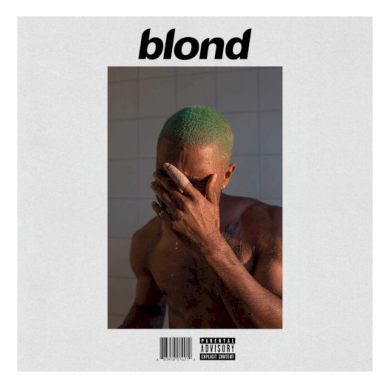

Dominant Color: (225, 225, 225)


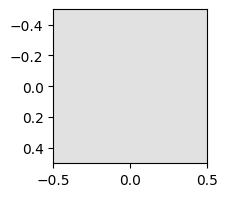

Top 5 Colors: [(225, 225, 225), (70, 59, 55), (149, 87, 63), (180, 124, 89), (108, 140, 108)]


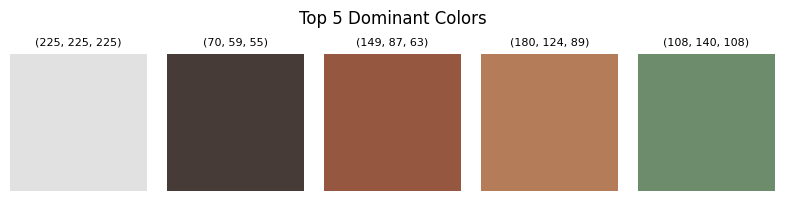

In [15]:
img = Image.open(frank_ocean_cover)
plt.imshow(img)
plt.axis("off")
plt.show()

# Create ColorThief object
color_thief = ColorThief(frank_ocean_cover)

# Extract dominant color with adjustable quality
quality = 5  # You can change this: 1 (high quality, slow) to ~10+ (faster, lower quality)
dominant_color = color_thief.get_color(quality=quality)
print(f"Dominant Color: {dominant_color}")
plt.figure(figsize=(2, 2))
plt.imshow([[dominant_color]])
plt.show()

n_dominant_colors = 5
# Extract top 5 dominant colors (palette)
palette = color_thief.get_palette(color_count=n_dominant_colors, quality=quality)
print(f"Top 5 Colors: {palette}")

# Plot the colors
plt.figure(figsize=(8, 2))
for i, color in enumerate(palette):
    plt.subplot(1, n_dominant_colors, i+1)
    plt.imshow([[color]])
    plt.axis('off')
    plt.title(f'{color}', fontsize=8)

plt.suptitle("Top 5 Dominant Colors", fontsize=12)
plt.tight_layout()
plt.show()


# CFDC Tests

Test sample images from paper by Chang & Mukai, comparing their results and out implementation of their method to check almost identical results.

Palette for a.jpg (RGB, 0-255):
[[233 138  93]
 [244 183 110]
 [ 78 189 204]
 [194 196 200]
 [ 48  64  77]]


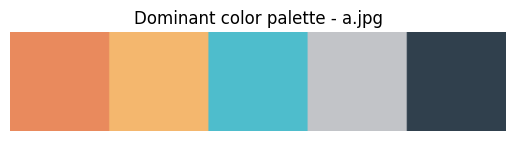

Palette for b.jpg (RGB, 0-255):
[[187 204  44]
 [ 77 117  44]
 [ 58 109 183]
 [192 119  40]
 [121 151 153]]


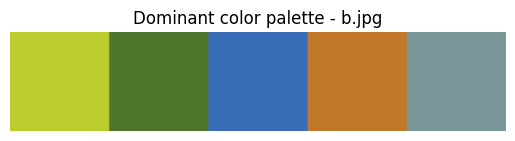

Palette for c.jpg (RGB, 0-255):
[[181 157  80]
 [189 191 187]
 [ 28  41  72]
 [ 55  97  96]
 [ 45  68  86]]


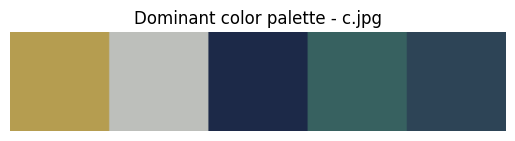

Palette for d.png (RGB, 0-255):
[[215 214 125]
 [ 26  87 197]
 [136  25  34]
 [ 10   8   6]
 [212 221 219]]


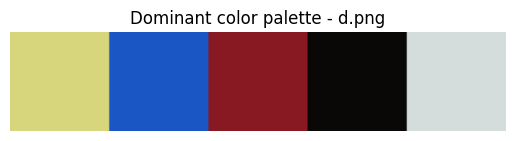

Palette for e.jpg (RGB, 0-255):
[[ 35 167  48]
 [220  62  59]
 [ 30 117 188]
 [252 252 252]
 [ 75  75  74]]


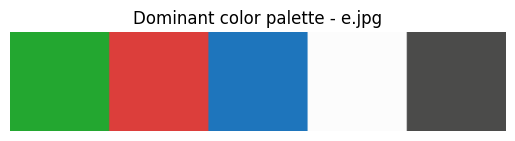

Palette for f.jpg (RGB, 0-255):
[[128  30  19]
 [220 145  68]
 [ 79  93  41]
 [221 218 218]
 [150 152 161]]


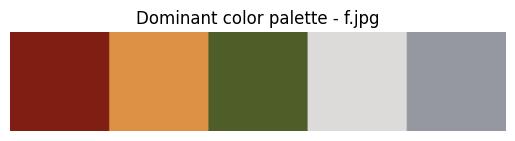

Palette for g.jpg (RGB, 0-255):
[[173  52  56]
 [ 96 135  45]
 [206  77 141]
 [ 74  75  93]
 [242 240 235]]


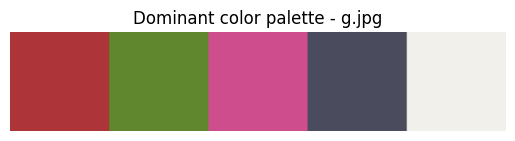

Palette for h.jpg (RGB, 0-255):
[[105 101  46]
 [ 22  81 197]
 [ 55 190 205]
 [239 242 244]
 [ 29  30  29]]


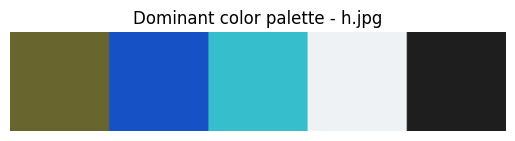

Palette for i.jpg (RGB, 0-255):
[[165  33  36]
 [200 153  82]
 [ 88 105  54]
 [226 228 233]
 [ 43  36  37]]


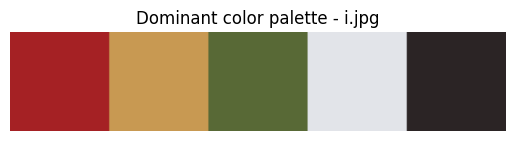

Palette for j.jpg (RGB, 0-255):
[[245 211  47]
 [ 87 117 168]
 [155  76  91]
 [ 28  28  57]
 [151 119  95]]


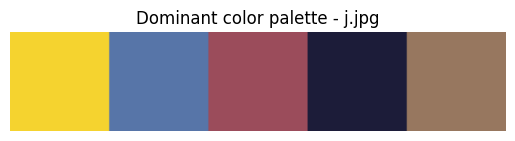

Palette for k.jpg (RGB, 0-255):
[[223  50  20]
 [ 12   9  23]
 [ 74 106 136]
 [ 88  25  25]
 [ 30  49  77]]


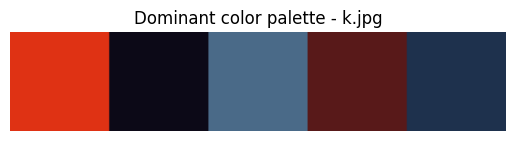

Palette for l.jpeg (RGB, 0-255):
[[233  68  31]
 [217 127  95]
 [191 193 178]]


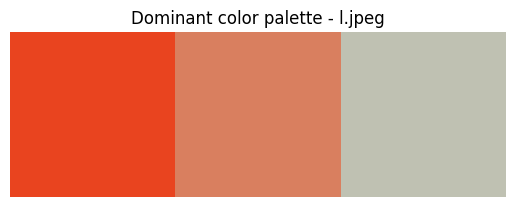

In [16]:
from albcovis.services.cfdc import DominantColorExtractor, ExtractorParams

import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# default params
extractor = DominantColorExtractor(ExtractorParams(
    k_init=12,
    bilateral_sigma_spatial=2.0,
    bilateral_sigma_color=0.08,
    rag_merge_thresh=8.0,
    erosion_iterations=1,
    n_final=5
))

folder = "../data/source/images/cfdc_article_comparison"

# get files, filter by extension, and sort
files = sorted(
    f for f in os.listdir(folder)
    if f.lower().endswith((".png", ".jpg", ".jpeg", ".webp"))
)

for filename in files:
    path = os.path.join(folder, filename)

    # open image with PIL
    img = Image.open(path).convert("RGB")

    # # resize if needed (max side = 600px)
    # w, h = img.size
    # scale = 600.0 / max(w, h)
    # if scale < 1.0:
    #     new_w, new_h = int(w * scale), int(h * scale)
    #     img = img.resize((new_w, new_h), Image.LANCZOS)

    # convert to numpy array
    # img_np = np.array(img)

    # extract palette
    out = extractor.extract(path)

    # out is a list of dicts like {"hex": ..., "rgb": [r,g,b], "lab": [...], "weight": ...}
    # build a (N, 3) array of uint8 colors
    palette = np.array([d["rgb"] for d in out], dtype=np.uint8)

    # optional: sort by weight descending if you prefer
    weights = np.array([d["weight"] for d in out])
    order = np.argsort(-weights)
    palette = palette[order]

    print(f"Palette for {filename} (RGB, 0-255):")
    print(palette)

    # make a swatch image: 50px tall, 50px per color, 3 channels
    sw = np.ones((50, 50 * len(palette), 3), dtype=np.uint8) * 255
    for i, c in enumerate(palette):
        sw[:, i*50:(i+1)*50, :] = c

    plt.figure()
    plt.imshow(sw)
    plt.axis("off")
    plt.title(f"Dominant color palette - {filename}")
    plt.show()


# Dominant Color Extraction Service Tests 

[{'hex': '#416BA8', 'rgb': [65, 107, 168], 'lab': [44.999, 4.505, -37.041], 'weight': 0.287}, {'hex': '#353A68', 'rgb': [53, 58, 104], 'lab': [26.031, 12.074, -27.978], 'weight': 0.227}, {'hex': '#271616', 'rgb': [39, 22, 22], 'lab': [9.361, 8.696, 3.546], 'weight': 0.189}, {'hex': '#802D25', 'rgb': [128, 45, 37], 'lab': [30.804, 35.534, 23.8], 'weight': 0.174}, {'hex': '#989FA7', 'rgb': [152, 159, 167], 'lab': [65.09, -0.949, -4.905], 'weight': 0.123}]


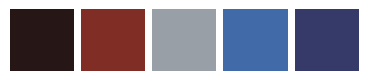

In [17]:
path = "../data/source/images/40654268451-px_500.jpg"

from albcovis.services.dominant_color_extraction import dominant_colors_kmeans

out = dominant_colors_kmeans(path)

print(out)
from albcovis.services.dominant_color_extraction import plot_color_swatch
ax = plot_color_swatch(
    out,
    orientation="horizontal",
    sort_by="hue",
    show_labels=False,
    label_fields=("hex",),
    show_percent=False,
    normalize_weights=False,
    gap=0.02,
    tile_aspect=2.0
)

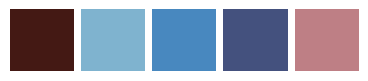

In [18]:
from albcovis.services.dominant_color_extraction import dominant_colors_colorthief
path = "../data/source/images/40654268451-px_500.jpg"

out = dominant_colors_colorthief(path)
from albcovis.services.dominant_color_extraction import plot_color_swatch
ax = plot_color_swatch(
    out,
    orientation="horizontal",
    sort_by="hue",
    show_labels=False,
    label_fields=("hex",),
    show_percent=False,
    normalize_weights=False,
    gap=0.02,
    tile_aspect=2.0
)

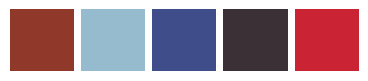

In [19]:
from albcovis.services.dominant_color_extraction import DominantColorExtractor, ExtractorParams
import matplotlib.pyplot as plt
import numpy as np

path = "../data/source/images/40654268451-px_500.jpg"

extractor = DominantColorExtractor(ExtractorParams(
    k_init=12,
    bilateral_sigma_spatial=2.0,
    bilateral_sigma_color=0.08,
    rag_merge_thresh=8.0,
    erosion_iterations=1,
    n_final=5
))

out = extractor.extract(path)
from albcovis.services.dominant_color_extraction import plot_color_swatch
ax = plot_color_swatch(
    out,
    orientation="horizontal",
    sort_by="hue",
    show_labels=False,
    label_fields=("hex",),
    show_percent=False,
    normalize_weights=False,
    gap=0.02,
    tile_aspect=2.0
)

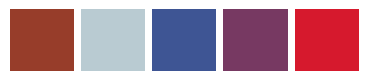

In [20]:
from albcovis.services.dominant_color_extraction import DominantColorExtractor, ExtractorParams
import matplotlib.pyplot as plt
import numpy as np

path = "../data/source/images/40654268451-px_500.jpg"

extractor = DominantColorExtractor(ExtractorParams(
    k_init=18,
    bilateral_sigma_spatial=1.5,
    bilateral_sigma_color=0.06,
    rag_merge_thresh=6.0,
    erosion_iterations=1,
    n_final=5
))

out = extractor.extract(path)
from albcovis.services.dominant_color_extraction import plot_color_swatch
ax = plot_color_swatch(
    out,
    orientation="horizontal",
    sort_by="hue",
    show_labels=False,
    label_fields=("hex",),
    show_percent=False,
    normalize_weights=False,
    gap=0.02,
    tile_aspect=2.0
)

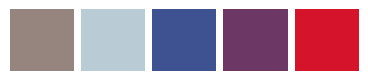

In [21]:
from albcovis.services.dominant_color_extraction import DominantColorExtractor, ExtractorParams
import matplotlib.pyplot as plt
import numpy as np

path = "../data/source/images/40654268451-px_500.jpg"

extractor = DominantColorExtractor(ExtractorParams(
    k_init=20,
    bilateral_sigma_spatial=1.0,
    bilateral_sigma_color=0.04,
    rag_merge_thresh=4.0,
    erosion_iterations=1,
    n_final=5
))

out = extractor.extract(path)
from albcovis.services.dominant_color_extraction import plot_color_swatch
ax = plot_color_swatch(
    out,
    orientation="horizontal",
    sort_by="hue",
    show_labels=False,
    label_fields=("hex",),
    show_percent=False,
    normalize_weights=False,
    gap=0.02,
    tile_aspect=2.0
)